In [1]:
import pandas as pd
try:
  import pickle5 as pickle
except:
  !pip install pickle5
  import pickle5 as pickle
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, GlobalMaxPooling1D, Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Model
from sklearn.metrics import roc_auc_score,roc_curve, auc
from numpy import random
from keras.layers import LSTM, Bidirectional, GlobalMaxPool1D, Dropout
from keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
import seaborn as sns

import sys
sys.path.insert(0,'/content/drive/MyDrive/ML_Data/')
import functions as f

     |████████████████████████████████| 133kB 5.3MB/s 
  Created wheel for pickle5: filename=pickle5-0.0.11-cp37-cp37m-linux_x86_64.whl size=219269 sha256=2ad10834586a43fa28a14d4b762084447b2c6d46885151a389ee8e63d0af42f0
  Stored in directory: /root/.cache/pip/wheels/a6/90/95/f889ca4aa8b0e0c7f21c8470b6f5d6032f0390a3a141a9a3bd
Successfully built pickle5


In [ ]:
def load_data(D=1,randomize=False):
    try:
        with open('/content/drive/MyDrive/ML_Data/df_train_'+str(D)+'D.pickle', 'rb') as handle:
            df_train = pickle.load(handle)
    except:
        df_train = pd.read_pickle("C:/Users/nik00/py/proj/hyppi-train.pkl")
    try:
        with open('/content/drive/MyDrive/ML_Data/df_test_'+str(D)+'D.pickle', 'rb') as handle:
            df_test = pickle.load(handle)
    except:
        df_test = pd.read_pickle("C:/Users/nik00/py/proj/hyppi-independent.pkl")
    if randomize:
        return shuff_together(df_train,df_test)
    else:
        return df_train,df_test

df_train,df_test = load_data(5)
print('The data used will be:')
df_train[['Joined']]

The data used will be:


,Joined
0,"[MKDKQ, KDKQK, DKQKK, KQKKK, QKKKK, KKKKE, KKK..."
1,"[MSWSG, SWSGL, WSGLL, SGLLH, GLLHG, LLHGL, LHG..."
2,"[MSLFD, SLFDL, LFDLF, FDLFR, DLFRG, LFRGF, FRG..."
3,"[MAVAP, AVAPR, VAPRL, APRLF, PRLFG, RLFGG, LFG..."
4,"[MSTIQ, STIQS, TIQSE, IQSET, QSETD, SETDC, ETD..."
...,...
6265,"[MSYFG, SYFGE, YFGEH, FGEHF, GEHFW, EHFWG, HFW..."
6266,"[MTVGK, TVGKS, VGKSS, GKSSK, KSSKM, SSKML, SKM..."
6267,"[MNNLS, NNLSF, NLSFS, LSFSE, SFSEL, FSELC, SEL..."
6268,"[MAPEI, APEIN, PEINL, EINLP, INLPG, NLPGP, LPG..."


Median length of Joined sequence is 875


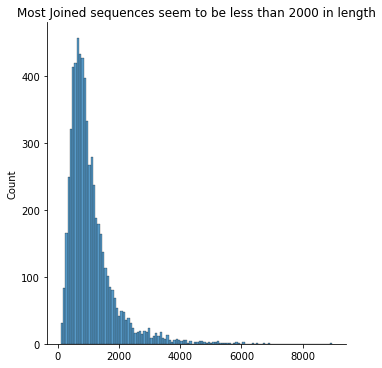

In [ ]:
rows = df_train['Joined'].shape[0]
lengths = sorted(len(s) for s in df_train['Joined'])
print("Median length of Joined sequence is",lengths[len(lengths)//2])
_  = sns.displot(lengths)
_=plt.title("Most Joined sequences seem to be less than 2000 in length")

MAX_VOCAB_SIZE is 500000
MAX_SEQUENCE_LENGTH is 2000
max sequence_data length: 5818
min sequence_data length: 29
median sequence_data length: 585


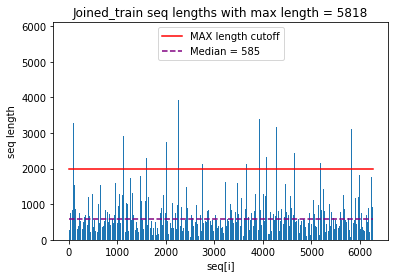

max word index: 499999
Found 1562791 unique tokens.
pre padding.
Shape of data tensor: (6270, 2000)
max sequences_test length: 4978
min sequences_test length: 53
median sequences_test length: 518


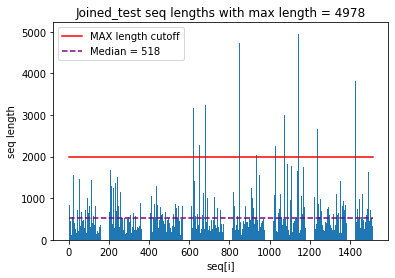

pre padding for test seq.
Shape of data_test tensor: (1514, 2000)
num_words is 500000


In [ ]:
data_5D_join,data_test_5D_join,num_words_5D_join,MAX_SEQUENCE_LENGTH_,MAX_VOCAB_SIZE_ = f.get_seq_data_join(500000,2000,df_train,df_test,pad='pre',show=True)

In [ ]:
EMBEDDING_DIM_ = 15
BATCH_SIZE = 128
EPOCHS = 10
FILTERS_=128
KERNEL_ =32
DROPOUT = 0.7


x = f.conv_model(MAX_SEQUENCE_LENGTH_,EMBEDDING_DIM_,num_words_5D_join)
output = Dense(1, activation='sigmoid')(x.output)
model_CNN_join = Model(x.input, output)
model_CNN_join.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#plot_model(model_CNN_join, to_file='model_plot.png', show_shapes=True, show_layer_names=False)

model_CNN_join.fit(data_5D_join, df_train['label'].values, epochs=EPOCHS, batch_size=BATCH_SIZE)
print(roc_auc_score(df_test['label'].values, model_CNN_join.predict(data_test_5D_join)))

Epoch 1/10
49/49 [==============================] - 6s 103ms/step - loss: 0.5857 - accuracy: 0.6902
Epoch 2/10
49/49 [==============================] - 5s 101ms/step - loss: 0.2996 - accuracy: 0.8939
Epoch 3/10
49/49 [==============================] - 5s 101ms/step - loss: 0.1001 - accuracy: 0.9658
Epoch 4/10
49/49 [==============================] - 5s 100ms/step - loss: 0.0420 - accuracy: 0.9878
Epoch 5/10
49/49 [==============================] - 5s 101ms/step - loss: 0.0172 - accuracy: 0.9961
Epoch 6/10
49/49 [==============================] - 5s 102ms/step - loss: 0.0136 - accuracy: 0.9960
Epoch 7/10
49/49 [==============================] - 5s 102ms/step - loss: 0.0064 - accuracy: 0.9989
Epoch 8/10
49/49 [==============================] - 5s 102ms/step - loss: 0.0032 - accuracy: 0.9991
Epoch 9/10
49/49 [==============================] - 5s 102ms/step - loss: 0.0044 - accuracy: 0.9981
Epoch 10/10
49/49 [==============================] - 5s 101ms/step - loss: 0.0016 - accuracy: 0.9994

In [2]:
def load_data(D=1,randomize=False):
    try:
        with open('/content/drive/MyDrive/ML_Data/df_train_'+str(D)+'D.pickle', 'rb') as handle:
            df_train = pickle.load(handle)
    except:
        df_train = pd.read_pickle("C:/Users/nik00/py/proj/hyppi-train.pkl")
    try:
        with open('/content/drive/MyDrive/ML_Data/df_test_'+str(D)+'D.pickle', 'rb') as handle:
            df_test = pickle.load(handle)
    except:
        df_test = pd.read_pickle("C:/Users/nik00/py/proj/hyppi-independent.pkl")
    if randomize:
        return shuff_together(df_train,df_test)
    else:
        return df_train,df_test

def diff_prot(df,dikt):
  df.Yersinia = df.Yersinia.apply(lambda x: [dikt[char] for char in x])
  df.Joined = [df.loc[row]['Human']+df.loc[row]['Yersinia'] for row in range(df.shape[0])]
  return df



df_train,df_test = load_data(1)
dikt={}
for char in set(df_train.loc[0]['Yersinia']+df_train.loc[0]['Human']):
    dikt[char] = chr(ord(char)+150)
df_test = diff_prot(df_test,dikt)
df_train = diff_prot(df_train,dikt)

print('Yersinia is changed to create seperate words:')
df_train

Yersinia is changed to create seperate words:


,Human,Yersinia,Joined,label
0,"[M, K, D, K, Q, K, K, K, K, E, R, T, W, A, E, ...","[ã, ×, á, ×, é, è, Þ, ä, â, é, ß, Ý, ß, é, ã, ...","[M, K, D, K, Q, K, K, K, K, E, R, T, W, A, E, ...",1
1,"[M, S, W, S, G, L, L, H, G, L, N, T, S, L, T, ...","[ã, ç, Þ, ì, ê, Ý, é, á, è, è, â, ß, Ý, í, ì, ...","[M, S, W, S, G, L, L, H, G, L, N, T, S, L, T, ...",0
2,"[M, S, L, F, D, L, F, R, G, F, F, G, F, P, G, ...","[ã, ×, Û, â, æ, ×, á, è, è, Ü, ê, è, ß, Ú, è, ...","[M, S, L, F, D, L, F, R, G, F, F, G, F, P, G, ...",1
3,"[M, A, V, A, P, R, L, F, G, G, L, C, F, R, F, ...","[ã, è, ß, Ü, ×, ß, é, Ù, é, é, ï, ê, ï, Ù, ï, ...","[M, A, V, A, P, R, L, F, G, G, L, C, F, R, F, ...",0
4,"[M, S, T, I, Q, S, E, T, D, C, Y, D, I, I, E, ...","[ã, é, ï, ×, Ü, æ, Ý, ê, Ü, æ, Ý, è, è, ã, è, ...","[M, S, T, I, Q, S, E, T, D, C, Y, D, I, I, E, ...",0
...,...,...,...,...
6265,"[M, S, Y, F, G, E, H, F, W, G, E, K, N, H, G, ...","[ã, ß, ê, ê, Ú, Ý, ä, é, ×, ì, ×, é, ì, ×, ï, ...","[M, S, Y, F, G, E, H, F, W, G, E, K, N, H, G, ...",1
6266,"[M, T, V, G, K, S, S, K, M, L, Q, H, I, D, Y, ...","[ã, é, ç, æ, æ, Ü, í, ç, ç, á, ê, â, ×, Û, ã, ...","[M, T, V, G, K, S, S, K, M, L, Q, H, I, D, Y, ...",1
6267,"[M, N, N, L, S, F, S, E, L, C, C, L, F, C, C, ...","[ã, é, Û, Ú, è, Þ, ç, ç, è, ç, ç, è, â, á, Û, ...","[M, N, N, L, S, F, S, E, L, C, C, L, F, C, C, ...",0
6268,"[M, A, P, E, I, N, L, P, G, P, M, S, L, I, D, ...","[ã, á, ä, â, é, Ü, ì, ×, Ý, â, ì, ß, â, â, Ý, ...","[M, A, P, E, I, N, L, P, G, P, M, S, L, I, D, ...",1


In [3]:
df_train = f.combine_AC(df_train,chunksize=5)
df_test = f.combine_AC(df_test,chunksize=5)
df_test

,Human,Yersinia,Joined,label
0,"[MYVTM, YVTMM, VTMMM, TMMMT, MMMTD, MMTDQ, MTD...","[ãêÝæç, êÝæçç, ÝæççÝ, æççÝá, ççÝáß, çÝáßâ, Ýáß...","[MYVTM, YVTMM, VTMMM, TMMMT, MMMTD, MMTDQ, MTD...",1
1,"[MEDHQ, EDHQH, DHQHV, HQHVP, QHVPI, HVPID, VPI...","[ãáäèê, áäèêâ, äèêâÝ, èêâÝé, êâÝéß, âÝéßÜ, Ýéß...","[MEDHQ, EDHQH, DHQHV, HQHVP, QHVPI, HVPID, VPI...",1
2,"[MVLGK, VLGKV, LGKVK, GKVKS, KVKSL, VKSLT, KSL...","[ãßßìê, ßßìêÝ, ßìêÝÝ, ìêÝÝ×, êÝÝ×Ý, ÝÝ×ÝÜ, Ý×Ý...","[MVLGK, VLGKV, LGKVK, GKVKS, KVKSL, VKSLT, KSL...",1
3,"[MEHKE, EHKEV, HKEVV, KEVVL, EVVLL, VVLLL, VLL...","[ãâßáâ, âßáââ, ßáââê, áââêá, ââêáì, âêáìÜ, êáì...","[MEHKE, EHKEV, HKEVV, KEVVL, EVVLL, VVLLL, VLL...",1
4,"[MAPRT, APRTL, PRTLW, RTLWS, TLWSC, LWSCY, WSC...","[ãêäêé, êäêéï, äêéïß, êéïßá, éïßáä, ïßáä×, ßáä...","[MAPRT, APRTL, PRTLW, RTLWS, TLWSC, LWSCY, WSC...",0
...,...,...,...,...
1509,"[MGTPA, GTPAS, TPASG, PASGR, ASGRK, SGRKR, GRK...","[ãßáâÝ, ßáâÝß, áâÝßì, âÝßìã, ÝßìãÚ, ßìãÚæ, ìãÚ...","[MGTPA, GTPAS, TPASG, PASGR, ASGRK, SGRKR, GRK...",1
1510,"[MRSAA, RSAAA, SAAAA, AAAAP, AAAPR, AAPRS, APR...","[ãèéÙâ, èéÙâé, éÙâéÝ, ÙâéÝê, âéÝêè, éÝêèÙ, Ýêè...","[MRSAA, RSAAA, SAAAA, AAAAP, AAAPR, AAPRS, APR...",1
1511,"[MLLRL, LLRLL, LRLLL, RLLLA, LLLAW, LLAWA, LAW...","[ãèìÛß, èìÛßÝ, ìÛßÝä, ÛßÝäã, ßÝäãé, ÝäãéÝ, äãé...","[MLLRL, LLRLL, LRLLL, RLLLA, LLLAW, LLAWA, LAW...",0
1512,"[MTLEE, TLEEL, LEELV, EELVA, ELVAC, LVACD, VAC...","[ãèâÜ×, èâÜ×ç, âÜ×çâ, Ü×çâÝ, ×çâÝí, çâÝíï, âÝí...","[MTLEE, TLEEL, LEELV, EELVA, ELVAC, LVACD, VAC...",0


In [36]:
data_5D_join,data_test_5D_join,num_words_5D_join,MAX_SEQUENCE_LENGTH_,MAX_VOCAB_SIZE_ = f.get_seq_data_join(1000000,2000,df_train,df_test,pad='pre')

MAX_VOCAB_SIZE is 1000000
MAX_SEQUENCE_LENGTH is 2000
max sequence_data length: 6858
min sequence_data length: 40
median sequence_data length: 695
max word index: 999999
Found 1969676 unique tokens.
pre padding.
Shape of data tensor: (6270, 2000)
max sequences_test length: 5560
min sequences_test length: 51
median sequences_test length: 582
pre padding for test seq.
Shape of data_test tensor: (1514, 2000)
num_words is 1000000


In [47]:
EMBEDDING_DIM_ = 15
BATCH_SIZE = 128
EPOCHS = 10
FILTERS_=128
KERNEL_ =32
DROPOUT = 0.9


ip = f.conv_model(MAX_SEQUENCE_LENGTH_,EMBEDDING_DIM_,num_words_5D_join)
x = Dropout(DROPOUT)(ip.output)
x = Dense(256)(x)
x = Dropout(DROPOUT)(x)
output = Dense(1, activation='sigmoid')(x)
model_CNN_join = Model(ip.input, output)
model_CNN_join.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#plot_model(model_CNN_join, to_file='model_plot.png', show_shapes=True, show_layer_names=False)

model_CNN_join.fit(data_5D_join, df_train['label'].values, epochs=EPOCHS, batch_size=BATCH_SIZE)
print(roc_auc_score(df_test['label'].values, model_CNN_join.predict(data_test_5D_join)))

Epoch 1/10
49/49 [==============================] - 11s 196ms/step - loss: 0.7737 - accuracy: 0.5112
Epoch 2/10
49/49 [==============================] - 10s 196ms/step - loss: 0.6845 - accuracy: 0.5540
Epoch 3/10
49/49 [==============================] - 10s 195ms/step - loss: 0.6626 - accuracy: 0.5841
Epoch 4/10
49/49 [==============================] - 10s 195ms/step - loss: 0.6298 - accuracy: 0.6053
Epoch 5/10
49/49 [==============================] - 10s 197ms/step - loss: 0.5850 - accuracy: 0.6617
Epoch 6/10
49/49 [==============================] - 9s 193ms/step - loss: 0.5201 - accuracy: 0.6858
Epoch 7/10
49/49 [==============================] - 10s 197ms/step - loss: 0.4329 - accuracy: 0.7775
Epoch 8/10
49/49 [==============================] - 10s 195ms/step - loss: 0.3681 - accuracy: 0.8263
Epoch 9/10
49/49 [==============================] - 10s 196ms/step - loss: 0.3146 - accuracy: 0.8543
Epoch 10/10
49/49 [==============================] - 10s 197ms/step - loss: 0.2698 - accurac